### 获取数据

In [1]:
# coding: utf-8
import pandas as pd
import requests
import random
import json
import time
header={
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/69.0.3497.100 Safari/537.36',
    'Connection':'keep-alive'
}
cookies = '__mta=147569288.1539613293789.1539613310187.1539616722700.3; v=3; \
        _lxsdk_cuid=166781a789ec8-0139751cb2ee6e-8383268-144000-166781a789fc8; \
        __mta=147569288.1539613293789.1539613293789.1539613310187.2; uuid_n_v=v1; \
        iuuid=9AF20AC0D08D11E89D508D0D63C93F71D10FE6A2B71B406D800371E2CD9160FE; webp=true; ci=96%2C%E6%B5%8E%E5%8D%97; \
        _lxsdk=9AF20AC0D08D11E89D508D0D63C93F71D10FE6A2B71B406D800371E2CD9160FE; _lxsdk_s=166784ecee0-b1a-f0b-22%7C%7C2'
cookie = {}
for line in cookies.split(';'):
    name, value = cookies.strip().split('=', 1)
    cookie[name] = value
print(cookie)

{'__mta': '147569288.1539613293789.1539613310187.1539616722700.3; v=3;         _lxsdk_cuid=166781a789ec8-0139751cb2ee6e-8383268-144000-166781a789fc8;         __mta=147569288.1539613293789.1539613293789.1539613310187.2; uuid_n_v=v1;         iuuid=9AF20AC0D08D11E89D508D0D63C93F71D10FE6A2B71B406D800371E2CD9160FE; webp=true; ci=96%2C%E6%B5%8E%E5%8D%97;         _lxsdk=9AF20AC0D08D11E89D508D0D63C93F71D10FE6A2B71B406D800371E2CD9160FE; _lxsdk_s=166784ecee0-b1a-f0b-22%7C%7C2'}


In [2]:

url = 'http://m.maoyan.com/mmdb/comments/movie/1203437.json?_v_=yes&offset=60'
html = requests.get(url=url, cookies=cookie,headers=header).content.decode('utf-8')

In [14]:
data = json.loads(html)['cmts']

In [15]:
print(data[0].get('gender'))

1


In [16]:
ying = pd.DataFrame(columns=['data','score','city','comment','nick','gender'])
for item in data:
    try:
        ying = ying.append({'data':item['time'].split(' ')[0],'city':item['cityName'],
                                        'score':str(item['score']),'comment':item['content'],'nick':item['nick'],'gender':item['gender']},
                                       ignore_index=True)
    except:
        ying = ying.append({'data':item['time'].split(' ')[0],'city':item['cityName'],
                                        'score':str(item['score']),'comment':item['content'],'nick':item['nick'],'gender':0},
                                       ignore_index=True)
print(ying)

          data score city              comment          nick gender
0   2018-10-29   3.5   吴江             不错，画面很漂亮          陌寞默默      1
1   2018-10-29   3.5   长沙  水墨丹青般的大片，画面大气，剧情紧凑。       易只羊的Cat      0
2   2018-10-29     3   北京              好！！！！！！  MTA874902337      0
3   2018-10-29     5   武汉             非常好看，超赞！  aBh958321859      0
4   2018-10-29   3.5   杭州   前面很平，后面打戏有惊喜。戛然而止。      尉尉Hellen      2
5   2018-10-29   4.5   嘉兴              还行，挺好看的  Ahe471257296      0
6   2018-10-29     5   青州         不错，老谋子故事性好多了          忧郁蓝海      1
7   2018-10-29     3   衡水            一般般，不怎么好看  bBM805939485      0
8   2018-10-29   2.5   郑州        预告怪好看，剧情不怎么好看  liu709089180      1
9   2018-10-29     5   大理             很满意，好血腥哦           独享伱      0
10  2018-10-29   4.5   包头         剧情很有意思，演技也不错        好饿啊么么哒      1
11  2018-10-29   4.5   南京  画面感十足，剧情有留白，国产良心电影！  MAL427975781      1
12  2018-10-29   4.5   天津               好看好看好看  WpU291626298      0
13  2018-10-29   3.5   无锡              还好吧，喜欢人  

In [ ]:
ying = pd.DataFrame(columns=['data','score','city','comment','nick','gender'])
for i in range(0,66):  
    
    try:
        time.sleep(2)
        url = 'http://m.maoyan.com/mmdb/comments/movie/1203437.json?_v_=yes&offset='+str(i*15)
        print(url)
        html = requests.get(url=url, cookies=cookie,headers=header).content.decode('utf-8')
        data = json.loads(html)['cmts']

        for item in data:
            try:
                ying = ying.append({'data':item['time'].split(' ')[0],'city':item['cityName'],
                                                'score':str(item['score']),'comment':item['content'],'nick':item['nick'],'gender':item['gender']},
                                               ignore_index=True)
            except:
                ying = ying.append({'data':item['time'].split(' ')[0],'city':item['cityName'],
                                                'score':str(item['score']),'comment':item['content'],'nick':item['nick'],'gender':0},
                                               ignore_index=True)
    except:
        print("error")
        continue

http://m.maoyan.com/mmdb/comments/movie/1203437.json?_v_=yes&offset=0


In [ ]:
ying.to_csv('ying.csv',index=False,encoding="utf_8_sig")

### 热力图

In [3]:
import pandas as pd
from pyecharts import Bar, Line,Overlap,Geo
import jieba
# from wordcloud import WordCloud,ImageColorGenerator
import matplotlib.pyplot as plt
from collections import Counter


ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\lml\utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


In [4]:
import numpy as np

In [7]:
ying = pd.read_csv('ying.csv',encoding="utf-8")

In [8]:
grouped = ying.groupby(['city'])
grouped_pct = grouped['score']

In [9]:
city_com = grouped_pct.agg(['mean', 'count'])

In [10]:
city_com.reset_index(inplace=True)

In [11]:
city_com['mean'] = round(city_com['mean'], 2)

In [12]:
data = [(city_com['city'][i], city_com['count'][i]) for i in range(0, city_com.shape[0])]

In [13]:

geo = Geo('全国热力图', title_color="#fff",title_pos="center", width=1200, height=600, background_color='#404a59')
# attr, value = geo.cast(data)


In [14]:
attrs=[]
values=[]

In [15]:
for attr,value in data:
    if geo.get_coordinate(attr)==None:
        continue
    else:
        attrs.append(attr)
        values.append(value)

In [16]:
geo.add("", attrs, values, type="heatmap",  is_visualmap=True, visual_range=[0, 20],visual_text_color="#fff")
geo.render('全国观影图.html')

In [17]:
geo

### 主要城市评分

In [18]:
city_main = city_com.sort_values('count',ascending=False)[0:20]

In [19]:
attr = city_main['city']
v1 = city_main['count']
v2 = city_main['mean']
line = Line("主要城市评分")
line.add("城市", attr, v2, is_stack=True, xaxis_rotate=30, yaxis_min=0, mark_point=["max", "min"], xaxis_interval=0,
         line_color='lightblue', line_width=4, mark_point_textcolor='black', mark_point_color='lightblue', is_splitline_show=False)
bar = Bar("主要城市评论数")
bar.add("城市", attr, v1, is_stack=True, xaxis_rotate=30, yaxis_min=0, xaxis_interval=0, is_splitline_show=False)
overlap = Overlap()
overlap.add(bar)
overlap.add(line, yaxis_index=1, is_add_yaxis=True)
overlap.render('主要城市评分and评论数.html')

In [20]:
overlap

### 评分折线图

In [21]:
city_score = city_main.sort_values('mean',ascending=False)[0:20]
attr = city_score['city']
v1 = city_score['mean']
line = Line('主要城市评分')
line.add("城市", attr, v1, is_stack=True, xaxis_rotate=30, yaxis_min=0, mark_point=["min", "max"], xaxis_interval=0,
         line_color='lightblue', line_width=4, mark_point_textcolor='black', mark_point_color='lightblue', is_splitline_show=True)
line.render('主要城市评分折线图.html')

In [22]:
line

### 全国打分图

In [23]:
city_score_area = city_com.sort_values('count',ascending=False)[0:100]
city_score_area.reset_index(inplace=True)

data = [(city_score_area['city'][i], city_score_area['mean'][i]) for i in range(0, city_score_area.shape[0])]
attrs=[] 
values=[]
for attr,value in data:
    if geo.get_coordinate(attr)==None:
        continue
    else:
        attrs.append(attr)
        values.append(value)

geo = Geo('全国打分图', title_color="#fff",title_pos="center", width=1200, height=600, background_color='#404a59')

geo.add("", attrs, values, visual_range=[0, 5],visual_text_color="#fff", symbol_size=15, is_visualmap=True,is_roam=False)
geo.render('全国打分图.html')

In [24]:
geo

### 词云

In [25]:
from wordcloud import WordCloud,ImageColorGenerator

In [26]:
ying_str = ' '.join(ying['comment'])

In [27]:
words_list = []
word_generator = jieba.cut_for_search(ying_str)#似乎word_generator只能被遍历一次

In [28]:
for word in word_generator:
    words_list.append(word)

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\HP\AppData\Local\Temp\jieba.cache
DEBUG:jieba:Dumping model to file cache C:\Users\HP\AppData\Local\Temp\jieba.cache
Loading model cost 1.442 seconds.
DEBUG:jieba:Loading model cost 1.442 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


In [29]:
words_list = [k for k in words_list if len(k)>1] #可去除标点

In [30]:
font_path = "D:\Fonts\simkai.ttf"#字体路径

In [31]:
wc = WordCloud(
    background_color="white", #背景颜色
    max_words=2000, #显示最大词数
    font_path=font_path,
    min_font_size=15,
    max_font_size=30, 

    )

生成词云成功!


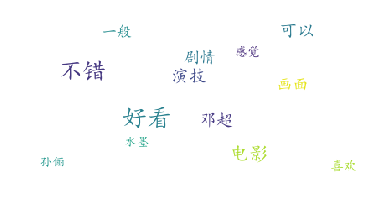

In [32]:



# back_color = plt.imread('爱心.jpg')
# wc = WordCloud(background_color='white',
#                mask=back_color,
#                font_path='C:\Windows\Fonts\STZHONGS.TTF',
#                max_words=2000,
#                max_font_size=250,
#                random_state=30,
#                )
love_apartment_count = Counter(words_list)
wc.generate_from_frequencies(love_apartment_count)
# image_colors = ImageColorGenerator(back_color)
plt.figure()
# plt.imshow(wc.recolor(color_func=image_colors))
plt.imshow(wc)
plt.axis('off')
print('生成词云成功!')
wc.to_file('love_apartment.jpg')

### 评分星级

In [33]:
from pyecharts import Pie
import numpy as np

In [36]:
ying = pd.read_csv('ying.csv',encoding="utf-8")

In [37]:
#将4.5算作5 ，类似3.5， 2.5， 1.5， 0.5
rate = ying['score']+0.1
rate = rate.apply(np.round)

In [38]:
value = rate.value_counts()

In [39]:
# attr = ['五星','四星半', '四星','三星半', '三星','二星半', '二星','一星半', '一星','半星','零星']

In [40]:
attr = ['五星', '四星', '三星', '二星', '一星','零星']

In [41]:
pie = Pie('《影》评分星级比例', title_pos='center', width=900)
pie.add('7-17', attr, value, center=[75, 50], is_random=True,
        radius=[30, 75], rosetype='area',
        is_legend_show=False, is_label_show=True)
pie.render('评分.html')

In [42]:
pie